In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch as pt
from tqdm import tqdm

In [19]:
def flatten_index(i,j, col=None):
    if col is None:
        col = N
    return (i-1)*col + (j-1)
    # grid is (N+2,N+2), the A has to be (N^2, N^2)
def unflatten_index(ind, col=None):
    if col is None:
        col = N+2
    i = ind//col
    j = ind%col
    return (i,j)

In [37]:


def create_A():
    A = np.zeros((N*N, N*N))

    for i in range(1, N+1): # will run 1 to N, so i-1 will be 0 to N-1
        for j in range(1, N+1):

            center = flatten_index(i, j)

            # main diagonal
            A[center, center] = 1 + 4*alpha

            # neighbors
            if i > 1:      # up
                A[center, flatten_index(i-1, j)] = -alpha
            if i < N:      # down
                A[center, flatten_index(i+1, j)] = -alpha
            if j > 1:      # left
                A[center, flatten_index(i, j-1)] = -alpha
            if j < N:      # right
                A[center, flatten_index(i, j+1)] = -alpha

    return A


def impose_boundary_condition(A,b, left_B = 0, right_B = 0, down_B = 0): #NxN
    
    for row in range(1,N+1):
        for col in range(1,N+1):
            i = row
            j = col
            if row == 1: # neumann
                up = flatten_index(i-1,j)
                center = flatten_index(i,j)
                A[center,center] -= alpha
            if row == N : # dirichlet
                down = flatten_index(i+1,j)
                center = flatten_index(i,j)
                b[center] += alpha * down_B
            if col == 1 :
                left = flatten_index(i,j-1)
                center = flatten_index(i,j)
                b[center] += alpha * left_B
            if col == N:
                right = flatten_index(i,j+1)
                center = flatten_index(i,j)
                b[center] += alpha * right_B
    return A,b

def flatten_grid(grid, remove_padding=True):
    if remove_padding:
        b = grid[1:N+1, 1:N+1].flatten()
    else:
        b = grid.flatten()
    return b

def unflatten_grid(grid, left_B = 0, right_B = 0, down_B = 0, add_padding=True):
    if add_padding:
        interior = grid.reshape((N,N))
        g = np.zeros((N+2, N+2))
        g[1:N+1, 1:N+1] = interior

        g[1:N+1, 0] = left_B
        g[1:N+1, N+1] = right_B
        g[N+1, 1:N+1] = down_B
    else:
        g = grid.reshape((N+2,N+2))
    return g

In [21]:
N = 50
delta_x = 0.1
delta_t = 0.05
timesteps = 50
D = 10
alpha = delta_t * D / delta_x
device='cuda'

In [22]:
grid = np.zeros((N+2,N+2, timesteps))
for i in range(N+2):
    grid[i,0,0] = 1
    grid[i,N+1,0] = 1

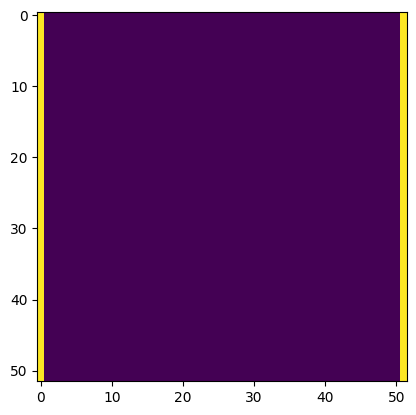

In [23]:
plt.imshow(grid[:,:,0])

In [28]:
b = pt.tensor(b)
for i in tqdm(range(1,timesteps)):
    
    A = create_A()
    g = unflatten_grid(b[:,0])[1,1]
    print(g)
    b_ = b[:,i-1].clone()
    A_, b_ = impose_boundary_condition(A,b_)
    A_ = pt.tensor(A_).to(device)
    b_ = pt.tensor(b_).to(device)
    x = pt.linalg.solve(A_,b_)
    b[:,i] = x

  0%|                                                                                           | 0/49 [00:00<?, ?it/s]C:\Users\umang\AppData\Local\Temp\ipykernel_7704\3681039250.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b_ = pt.tensor(b_).to(device)


0.0


  2%|█▋                                                                                 | 1/49 [00:00<00:22,  2.16it/s]

0.0


  4%|███▍                                                                               | 2/49 [00:00<00:15,  3.01it/s]

0.0


  8%|██████▊                                                                            | 4/49 [00:01<00:12,  3.74it/s]

0.0
0.0


 10%|████████▍                                                                          | 5/49 [00:01<00:11,  3.87it/s]

0.0


 12%|██████████▏                                                                        | 6/49 [00:01<00:10,  3.99it/s]

0.0


 14%|███████████▊                                                                       | 7/49 [00:01<00:10,  4.06it/s]

0.0


 18%|███████████████▏                                                                   | 9/49 [00:02<00:09,  4.20it/s]

0.0


 20%|████████████████▋                                                                 | 10/49 [00:02<00:08,  4.38it/s]

0.0
0.0


 24%|████████████████████                                                              | 12/49 [00:02<00:08,  4.57it/s]

0.0
0.0


 29%|███████████████████████▍                                                          | 14/49 [00:03<00:07,  4.66it/s]

0.0
0.0


 33%|██████████████████████████▊                                                       | 16/49 [00:03<00:06,  4.74it/s]

0.0


 35%|████████████████████████████▍                                                     | 17/49 [00:04<00:06,  4.71it/s]

0.0


 37%|██████████████████████████████                                                    | 18/49 [00:04<00:06,  4.80it/s]

0.0
0.0


 41%|█████████████████████████████████▍                                                | 20/49 [00:04<00:06,  4.78it/s]

0.0
0.0


 43%|███████████████████████████████████▏                                              | 21/49 [00:04<00:05,  4.73it/s]

0.0


 45%|████████████████████████████████████▊                                             | 22/49 [00:05<00:06,  4.46it/s]

0.0


 49%|████████████████████████████████████████▏                                         | 24/49 [00:05<00:05,  4.59it/s]

0.0


 51%|█████████████████████████████████████████▊                                        | 25/49 [00:05<00:05,  4.59it/s]

0.0
0.0


 53%|███████████████████████████████████████████▌                                      | 26/49 [00:06<00:05,  4.55it/s]

0.0


 57%|██████████████████████████████████████████████▊                                   | 28/49 [00:06<00:04,  4.60it/s]

0.0
0.0


 59%|████████████████████████████████████████████████▌                                 | 29/49 [00:06<00:04,  4.65it/s]

0.0


 63%|███████████████████████████████████████████████████▉                              | 31/49 [00:07<00:03,  4.76it/s]

0.0
0.0


 67%|███████████████████████████████████████████████████████▏                          | 33/49 [00:07<00:03,  4.90it/s]

0.0


 69%|████████████████████████████████████████████████████████▉                         | 34/49 [00:07<00:03,  4.72it/s]

0.0
0.0


 73%|████████████████████████████████████████████████████████████▏                     | 36/49 [00:08<00:02,  4.88it/s]

0.0


 76%|█████████████████████████████████████████████████████████████▉                    | 37/49 [00:08<00:02,  4.94it/s]

0.0
0.0


 80%|█████████████████████████████████████████████████████████████████▎                | 39/49 [00:08<00:02,  4.81it/s]

0.0


 82%|██████████████████████████████████████████████████████████████████▉               | 40/49 [00:08<00:01,  4.89it/s]

0.0
0.0


 86%|██████████████████████████████████████████████████████████████████████▎           | 42/49 [00:09<00:01,  4.99it/s]

0.0


 88%|███████████████████████████████████████████████████████████████████████▉          | 43/49 [00:09<00:01,  5.01it/s]

0.0
0.0


 92%|███████████████████████████████████████████████████████████████████████████▎      | 45/49 [00:09<00:00,  5.08it/s]

0.0
0.0


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 47/49 [00:10<00:00,  5.13it/s]

0.0


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 48/49 [00:10<00:00,  5.16it/s]

0.0
0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:10<00:00,  4.60it/s]


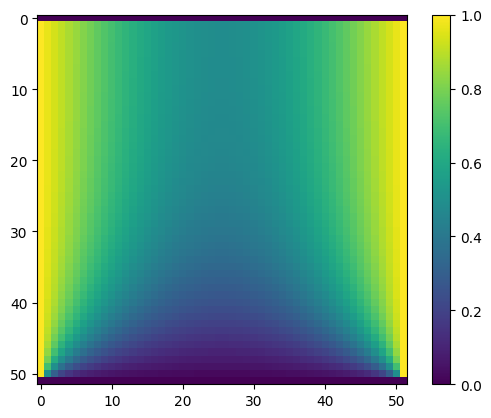

In [31]:
t = 49
cur_b = b[:,t]
g = unflatten_grid(cur_b)
plt.imshow(g)
plt.colorbar()

In [60]:
b.shape

torch.Size([2500, 50])

In [75]:
unflatten_grid(b[:,1])[1,1]

6.92522729192122

In [35]:
grid = np.zeros((N+2,N+2, timesteps))
for i in range(N+2):
    grid[i,0,0] = 1
    grid[N+1,i,0] = 1

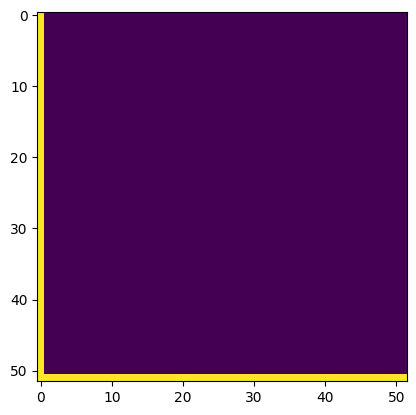

In [36]:
plt.imshow(grid[:,:,0])

In [39]:
b = pt.tensor(b)
for i in tqdm(range(1,timesteps)):
    
    A = create_A()
    b_ = b[:,i-1].clone()
    A_, b_ = impose_boundary_condition(A,b_, left_B = 1, down_B = 1)
    A_ = pt.tensor(A_).to(device)
    b_ = pt.tensor(b_).to(device)
    x = pt.linalg.solve(A_,b_)
    b[:,i] = x

C:\Users\umang\AppData\Local\Temp\ipykernel_7704\3957164948.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = pt.tensor(b)
  0%|                                                                                           | 0/49 [00:00<?, ?it/s]C:\Users\umang\AppData\Local\Temp\ipykernel_7704\3957164948.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b_ = pt.tensor(b_).to(device)
100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:11<00:00,  4.44it/s]


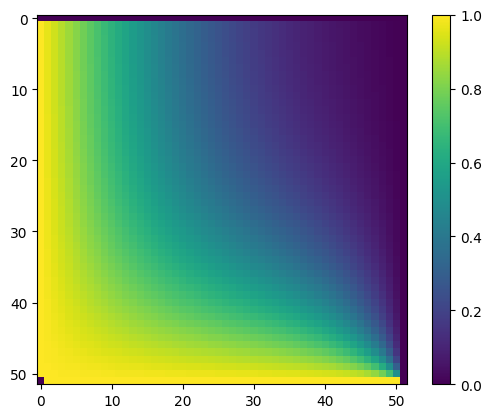

In [43]:
t = 45
cur_b = b[:,t]
g = unflatten_grid(cur_b, left_B = 1, down_B = 1)
plt.imshow(g)
plt.colorbar()